In [1]:
%matplotlib inline 
# so that plots don't pop up in separate windows
import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical calculations

# Introduction

A simple model for stochastic dynamics is the so-called random walk ( https://en.wikipedia.org/wiki/Random_walk ), in which both space and time are discrete.

The time evolution for this model is defined as follows.

* A particle starts at step $0$ at a point $X_0 \in \{..., -2,-1,0,1,2,...\}$. 
* At each step, the particle either goes one step to the left or to the right. Both directions are equally probable.

In formulas, the second rule means that the position at step $n+1$ is obtained from the position at time $n$ via

\begin{equation}
    X_{n+1} = X_{n} + \eta_n,
\end{equation}

where $\eta_n$ is a random variable that takes on the value $\pm 1$ with probability $1/2$, i.e.

\begin{equation}
    P( \eta_n = 1) = P( \eta_n = -1) =\frac{1}{2}.
\end{equation}

For different $n$, the $\eta_n$ are independent of each other. This means that what the particle did in the past does not influence whether it goes left or right now.

In the following we simulate this random walk and study its properties. More explicitly, we

* simulate and illustrate an individual trajectory,
* estimate the distribution of final positions after 100 steps from simulations, and compare the result to a Gaussian distribution,
* estimate the probability that the final position is larger than a given threshold value, and
* estimate mean and variance of the final position and see how these quantities change as we change the number of steps.

# Simulation and visualization of an individual trajectory

We now simulate a random walk with $N = 100$ steps, starting at $X_0 = 0$.

In [2]:
N_steps = 100 # number of steps
initial_position = 0 # initial position

trajectory = np.zeros(N_steps+1) # in this array we store the positions of the particle
trajectory[0] = initial_position # the particle starts out at "initial_position"

for i in range(N_steps): # we go through all the time steps
    # First we generate a random number that is either -1 or 1.
    #
    # Since python generates random numbers that are either 0 or 1, we need 
    # to make a transformation that maps those to -1, 1. This transformation is
    #   eta_n = 2 * ( random number - 0.5 )
    # For "random number = 0" we get -1,
    # for "random number = 1" we get 1.
    current_eta = 2*(np.random.randint(low=0,high=2)-0.5)
    #
    # We obtain the position at the next step by adding the random number to 
    # the current position
    trajectory[i+1] = trajectory[i] + current_eta

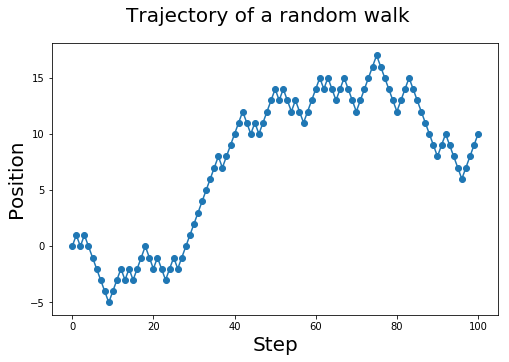

In [3]:
# We now plot the trajectory
fig, ax = plt.subplots(1,1,figsize=(8,5))
fig.suptitle('Trajectory of a random walk',
            fontsize=20)
ax.plot(trajectory,marker='o')
ax.set_xlabel(r'Step',fontsize=20)
ax.set_ylabel(r'Position',fontsize=20)
plt.show(fig)
plt.close(fig)

# Averaging over many trajectories

## Final position after $N =100$ steps

If you run the above two cells several times, you will see a different trajectory each time. This is of course a core feature of the random walk. If we get different trajectories all the time, how can we extract meaningful information from simulations of the random walk?

The key is to simulate a lot of random walks, and then average over all of them. While for each simulation/experiment we cannot predict the outcome, we can make predictions about the average over many simulations/experiments.

In the following we simulate $M=30000$ random walks with $N=100$ steps each. Each random walk starts at $X_0 = 0$, and we analyze the final positions of all these random walks.

To simulate these, we note that the position at step $N$ is related to the initial position via

\begin{equation}
    X_{N} = X_{N-1} + \eta_{N-1} = X_{N-2} + \eta_{N-2} + \eta_{N-1} = ... = X_{0} + \sum_{k=0}^{N-1} \eta_{k},
\end{equation}

which we obtain from applying the definition of a step several times.
This equation says: **To get the final position $X_{N}$, we only need to generate and add up $N$ random numbers, and add the result to the initial position $X_{0}$.**

### <font color='red'>*Question: If $X_0$ is even and $N$ is even/odd, what does this imply for the final position $X_N$?*</font>

In [4]:
N_steps = 100 # number of steps
N_simulations = 30000 # number of random walks we simulate
initial_position = 0 # initial position for each random walk

final_positions = np.zeros(N_simulations) # in this array we store the final positions of the random walk

for i in range(N_simulations):
    # for each of the simulations, calculate the final position
    current_final_position = initial_position + sum( 2*(np.random.randint(low=0,high=2,size=N_steps)-0.5) )
    # store the final position
    final_positions[i] = current_final_position
    
print("The first 10 'final positions' are:")
print(final_positions[:10])

The first 10 'final positions' are:
[-10.  -2.  14.   4.  26.  -6.  -2.  -8.  -6.  12.]


## Visualization of the final positions

We now have a list with all the final positions. To visualize those, we make a histogram. This means we divide space into intervals, and then count how many simulations end up in each of those intervals.

We compare the resulting histogram with the Gaussian probability distribution
\begin{equation}
    \rho(x) = \frac{1}{\sqrt{ 2\pi \sigma^2}} \exp\left[- \frac{x^2}{2 \sigma^2} \right],
\end{equation}
where we choose $\sigma^2 = N$ (remember $N$ is the number of steps for each simulation).

*(Note that the histogram is not normalized, i.e. does not integrate to $1$. On the other hand, the Gaussian distribution is normalized to integrate to $1$. To properly compare the histogram to the Gaussian distribution, we multiply the latter by the integral over the histogram. This means that in the following plot, the area under the histogram bars is the same as the area under the Gaussian probability distribution.)*

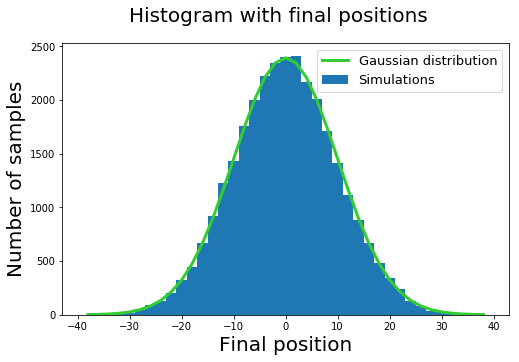

In [5]:
# Define the boundaries of the intervals
# The boundary should range from
# - a little bit to the left of the smallest final position we got
# to
# - a little bit to the right of the largest final position we got.
bin_edges = np.arange(np.min(final_positions)-1, # left end of leftmost interval
                      np.max(final_positions)+1, # right end of rightmost interval
                      2) # each interval is 2 units of length wide

# This numpy-function calculates the histogram for ous
hist, bin_edges = np.histogram(final_positions,
                               bins=bin_edges)
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2.
bin_width = bin_edges[1]-bin_edges[0]

# Define the Gaussian distribution
sigma_squared_gaussian = N_steps
gaussian_distribution = 1/np.sqrt(2*np.pi*sigma_squared_gaussian)*np.exp(- bin_centers**2/(2*sigma_squared_gaussian))
gaussian_distribution *= bin_width*N_simulations # multiply with the total area of the histogram

# Plot
fig, ax = plt.subplots(1,1,figsize=(8,5))
fig.suptitle('Histogram with final positions',
            fontsize=20)
ax.bar(bin_centers,hist,bin_width,
      label='Simulations')
ax.plot(bin_centers,gaussian_distribution,
        linewidth=3,
        label='Gaussian distribution',
       color='limegreen')
ax.set_xlabel(r'Final position',fontsize=20)
ax.set_ylabel(r'Number of samples',fontsize=20)
ax.legend(loc='best',fontsize=13)
plt.show(fig)
plt.close(fig)

**We see that averaging over a lot of simulations leads to very well-defined behavior!** In particular we see that the final positions follow approximately a Gaussian distribution. This is an instance of the central limit theorem ( https://en.wikipedia.org/wiki/Central_limit_theorem ), which explains why the Gaussian distribution is ubiquitous in nature.

### <font color='red'>*Question: How does the agreement between the simulations and the Gaussian curve change if you reduce the number of trajectories over which we average?*</font>

## The probability to end up somewhere

With our dataset, we can also ask how likely it is that a trajectory ends up somewhere. We illustrate this by estimating from our dataset the probability 

\begin{equation}
    P(X_{N} \geq T),
\end{equation}

i.e. the probability that the final position is larger or equal than some number $T \in \{...,-2,-1,0,1,2,..\}$.

In [6]:
def how_many_larger_than_threshold(threshold,print_results=True):
    larger_than_threshold = sum( (final_positions >= threshold))
    if print_results == True:
        print("Out of {0} simulations, a total of {1} fulfilled '(final position) >= {2}' at step {3}.".format(N_simulations,
                                                                       larger_than_threshold,threshold,N_steps ))
        print("That is {0}% of the simulations.".format(larger_than_threshold/N_simulations*100))
    return larger_than_threshold

In [7]:
how_many_larger_than_threshold(threshold=0);

Out of 30000 simulations, a total of 16145 fulfilled '(final position) >= 0' at step 100.
That is 53.81666666666667% of the simulations.


In [8]:
how_many_larger_than_threshold(threshold=10);

Out of 30000 simulations, a total of 5446 fulfilled '(final position) >= 10' at step 100.
That is 18.153333333333332% of the simulations.


In [9]:
how_many_larger_than_threshold(threshold=30);

Out of 30000 simulations, a total of 56 fulfilled '(final position) >= 30' at step 100.
That is 0.18666666666666668% of the simulations.


### <font color='red'>*Question: What value for the above probabilities does the Gaussian distribution predict?*</font>

## Mean and variance

Two important quantities for any probability distribution are the mean and the variance. In our context, the mean

\begin{equation}
    \langle X_N \rangle
\end{equation}

quantifies where on average the particle has gone after $N$ steps. The variance ( https://en.wikipedia.org/wiki/Variance )

\begin{equation}
   \mathrm{Var}(X_N) =  \langle X_N^2 \rangle - \langle X_N \rangle^2
\end{equation}

on the other hand is a measure for spread out the probability distribution of $X_N$ is around the mean.

### <font color='red'>*Question: What value do you expect for the mean and why?*</font>

We now study how mean and variance depend on the number of steps $N$. For this we run simulations with a total number of steps $N =10$, $25$, $50$, $75$, $100$. For each value of $N$ we run $30000$ simulations and calculate mean and variance of the resulting final positions.

In [10]:
N_steps = [10,25,50,75,100] # number of steps we consider
N_simulations = 30000  # number of simulations per step
starting_position = 0 # initial position for simulations

means = np.zeros(len(N_steps)) # in this array we store the means
variances = np.zeros(len(N_steps)) # in this array we store the variances
# both arrays have the have the same length as the list "N_steps",
# because for each simulation time in "N_steps" we will obtain a mean and a variance
 
for i,current_N_steps in enumerate(N_steps):
    # for every value in the list "N_steps", we run
    # N_simulations independent simulations.
    final_positions = np.zeros(N_simulations)
    for j in range(N_simulations):
        current_final_position = starting_position + sum( 2*(np.random.randint(low=0,high=2,size=current_N_steps)-0.5) )
        final_positions[j] = current_final_position
    # From these simulations we calculate mean and variance
    # and store them in the arrays "means", "variances"
    means[i] = np.mean(final_positions)
    variances[i] = np.var(final_positions)

We now plot the resulting means and variances as a function of $N$.

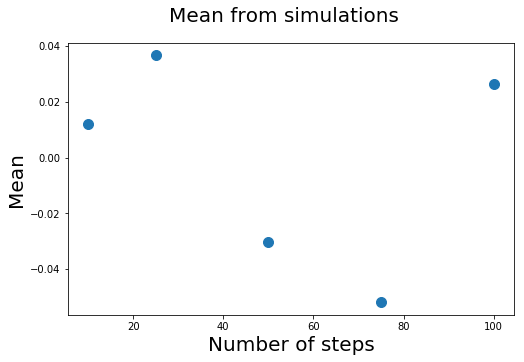

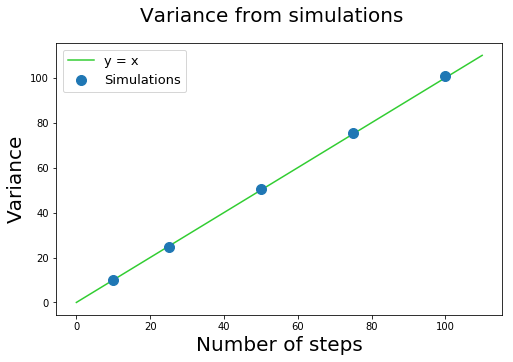

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
fig.suptitle('Mean from simulations',
            fontsize=20)
ax.plot(N_steps,means,
        marker='o',markersize=10,linestyle='')
ax.set_xlabel(r'Number of steps',fontsize=20)
ax.set_ylabel(r'Mean',fontsize=20)
plt.show(fig)
plt.close(fig)

print('\n\n')
fig, ax = plt.subplots(1,1,figsize=(8,5))
fig.suptitle('Variance from simulations',
            fontsize=20)
ax.plot(np.linspace(0,N_steps[-1]+10),np.linspace(0,int(N_steps[-1]+10)),
        color='limegreen',
        label=r'y = x')
ax.plot(N_steps,variances,
        label='Simulations',
        linestyle='',
        markersize=10,
        marker='o')
ax.legend(loc='best',fontsize=13)
ax.set_xlabel(r'Number of steps',fontsize=20)
ax.set_ylabel(r'Variance',fontsize=20)
plt.show(fig)
plt.close(fig)

* From the first plot we see that the mean is rather small, which is actually expected. **Because in each step we have equal probability to go to the left or to the right, the mean position $X_N$ is equal to the initial position $X_0$.**
* From the second plot we see that the variance grows linearly with the number of steps, i.e. $\mathrm{Var}(X_N) = N$. This tells us that **the more steps we take, the more spread out is the final position of the particle.** This is also somewhat intuitive.

*(Note that the symbol $\sigma^2$ in the Gaussian distribution we plotted a bit above is the variance of the Gaussian distribution. If you want, you can compare the value we used up there to the numerical values estimated from simulations here.)*

### <font color='red'>*Question: What happens if we make the random walk asymmetric? Calculate mean and variance for a simulated random walk where the probabilities to go to the left and to the right are not equal. What changes and how?*</font>

<font color='red'>*(Hint: You can use the following code to generate random numbers $\pm 1$ where the value $1$ comes up with probability $p$ and the value $-1$ comes up with probability $1-p$.)*</font>

In [12]:
def random_number(p=0.5): # p should always be in (0,1)
    cur_random_number = np.random.random() # generate random number equally distributed in (0,1)
    if cur_random_number <= p: # if the random number is smaller or equal p, return 1
        return 1               # (note that the probability for this to happen is precisely p)
    else: # otherwise return -1
        return -1

# For further study

Introduce an absorbing boundary at a point $B$. This means that if $X_n  \leq B$, then the simulation should stop. 

You can think of this as a game of chance. You start with an initial fortune $X_0$, and play a game in which you win or lose money at each step (say with probability 1/2 you win one unit of money, and with probability 1/2 you lose one unit of money). 

If you reach $B=0$ you are bankrupt, and therefore cannot participate in the game anymore.

You can use simulations of this model to study questions like
* Starting with $X_0 = 10$, what is the probability to still be in the game after $N=100$ steps? ("still be in the game" means not having gone bankrupt in the first 100 steps)
* Starting with $X_0 = 10$, what is the probability to have more than $20$ units of money after $N=100$ steps?
* For a given $X_0$, how do mean and variance change as a function of $N$?
* What is the probability to go bankrupt eventually?